In [69]:
import random
import numpy as np 
import matplotlib.pyplot as plt
import seaborn


In [70]:
%matplotlib inline

ERROR! Session/line number was not unique in database. History logging moved to new session 403


In [71]:
class Car:
    def __init__(self, location = 0, next_car=None, cruise_speed=33, car_length=5, num_cars=30):
        self.cruise_speed = cruise_speed
        self.car_length = car_length
        self.speed = 0
        self.location = location
        self.next_car = next_car
    
    #def __str__(self):
        #return self.location
        
    def can_accelerate(self):
        if self.speed < (abs(self.next_car.location - self.location) - self.car_length):
            return True
        else:
            self.speed = abs(self.next_car.location - self.location) - self.car_length
            if self.speed < 0:
                self.speed = 0
                return True
    
    def can_decelerate(self):
        if random.random() < .1:
            return True
        return False
    
    def accelerate(self, acceleration_rate=2):
        self.speed += acceleration_rate
        if self.speed >= self.cruise_speed:
            self.speed = self.cruise_speed
        self.location += self.speed
        if self.location >= 1000:
            self.location = self.location % 1000
            
    def decelerate(self, deceleration_rate = 2):
        self.speed -= deceleration_rate
        if self.speed < 2:
            self.speed = 0
        if self.location >= 1000:
            self.location = self.location % 1000
    
    def move_forward(self):
        if self.can_decelerate():
            self.decelerate()
        elif self.can_accelerate():
            self.accelerate()
        
    

In [72]:
class Sim:
    
    def __init__(self):
        pass
    
    def create_cars(self, num_cars= 30):
        car_list = []
        location = np.linspace(0,970, num_cars, dtype="int64")
        previous_car = None
        for x in range(num_cars):
            car_item = Car(location=location[x])
            car_list.append(car_item)
            car_list[x-1].next_car = car_list[x]
        car_list[num_cars - 1].next_car = car_list[0]
        return car_list
    

In [73]:
def start_sim(x):
    return Sim()

def create_cars(x):
    return x.create_cars()

def print_locations(y):
    for x in y:
        print(x.location)
        print(x.next_car)
        print("---")
        
sim = start_sim("x")
cars = create_cars(sim)


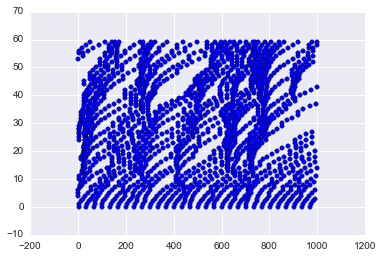

In [74]:
for y in range(60):
    for x in cars:
        x.move_forward()
        plt.scatter(x.location, y)


In [68]:
for y in range(60):
    for x in cars:
        x.move_forward()
        print(x.location)
    print("-----")

631
652
660
673
690
725
782
891
918
944
965
11
16
31
49
86
101
130
165
212
261
286
305
345
431
470
552
576
585
614
-----
641
652
660
679
700
739
782
908
927
958
965
11
16
39
60
89
101
142
185
232
261
286
318
364
458
492
556
576
591
628
-----
641
652
670
687
712
755
802
908
938
958
978
11
28
49
73
89
110
156
207
254
261
302
333
385
487
516
562
582
599
628
-----
641
657
670
697
726
773
824
908
951
962
993
13
42
49
73
91
121
172
231
254
283
320
350
408
487
542
570
590
609
628
-----
649
664
680
709
726
793
848
922
951
968
10
17
42
59
86
95
134
172
231
258
307
340
369
433
513
542
580
600
621
638
-----
659
673
692
709
740
815
874
938
959
976
10
23
46
71
86
101
149
188
231
264
307
362
390
460
513
568
592
612
621
650
-----
659
684
692
723
740
839
874
938
969
986
14
31
52
71
92
109
166
206
249
272
331
386
413
489
539
568
606
612
635
650
-----
659
684
692
723
754
865
900
956
981
986
20
31
60
83
100
119
185
226
249
282
357
386
438
520
539
589
606
618
635
650
-----
668
684
704
737
770
893
928
976
